#### Non-Linear Relationships: Polynomial Regression & Logarithmic Transformation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()

# Create a DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target

# View the first few rows of the dataset
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### Exploring Relationships

Let’s first visualize the relationship between MedInc (median income) and the target (median house value). We'll start by visualizing a potential linear relationship.

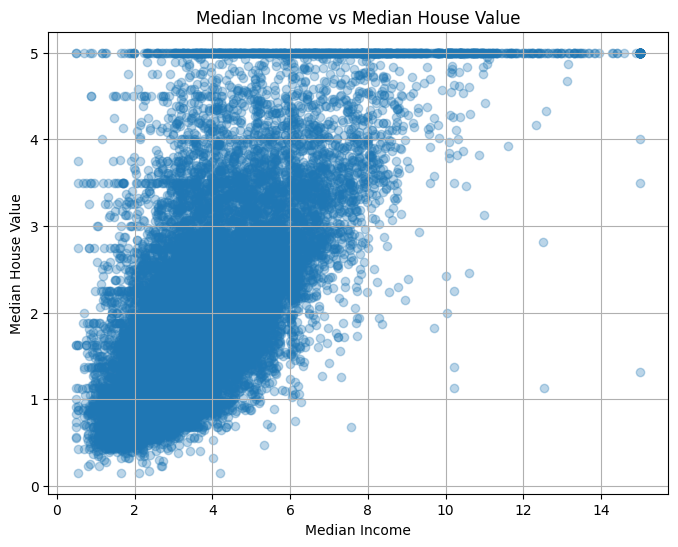

In [3]:
# Scatter plot of Median Income vs House Value
plt.figure(figsize=(8, 6))
plt.scatter(data['MedInc'], data['target'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.grid(True)
plt.show()

##### Polynomial Regression


Since the relationship between MedInc and target doesn’t appear to be strictly linear, we can use Polynomial Regression to model this non-linear relationship.

Train R2: 0.4816
Test R2: 0.4633
Test RMSE: 0.8386


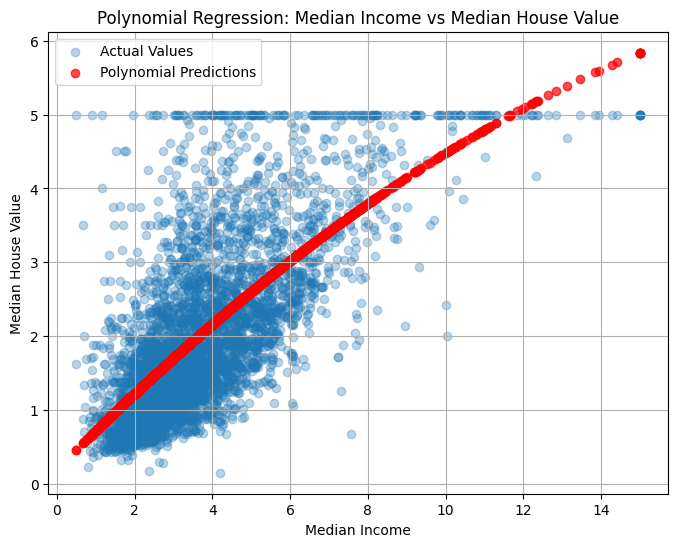

In [4]:
# Define the feature and target variable
X = data[['MedInc']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features for polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
print(f"Train R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# Scatter plot with Polynomial Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Actual Values')
plt.scatter(X_test, y_test_pred, color='red', alpha=0.7, label='Polynomial Predictions')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression: Median Income vs Median House Value')
plt.legend()
plt.grid(True)
plt.show()

##### Logarithmic Transformation

Now, let’s attempt a Logarithmic Transformation on the target variable to handle potential non-linearities

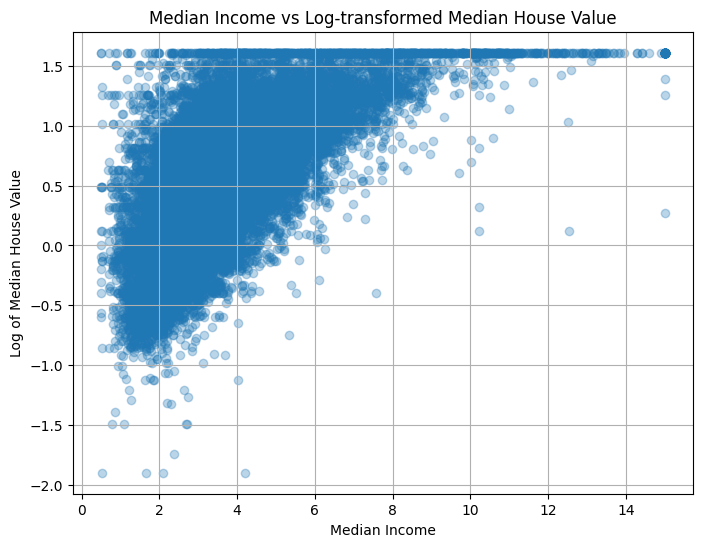

Log-Transformed Train R2: 0.4366
Log-Transformed Test R2: 0.4211
Log-Transformed Test RMSE: 0.4335


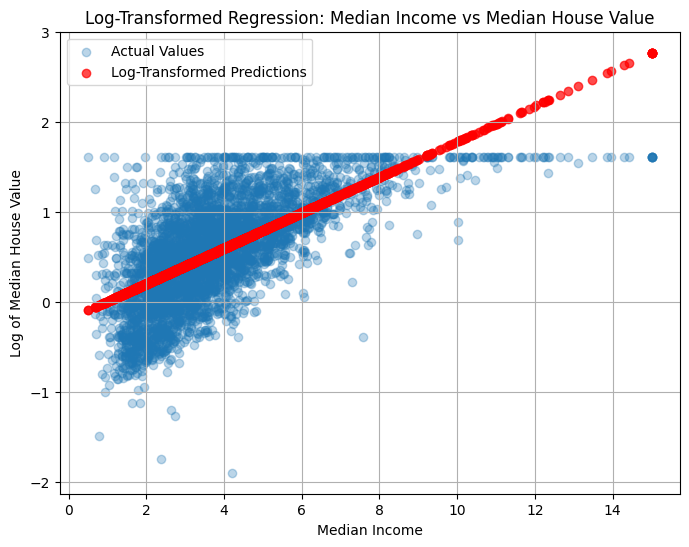

In [5]:
# Apply a logarithmic transformation to the target variable
data['log_target'] = np.log(data['target'])

# Scatter plot of Median Income vs Log-transformed House Value
plt.figure(figsize=(8, 6))
plt.scatter(data['MedInc'], data['log_target'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Log of Median House Value')
plt.title('Median Income vs Log-transformed Median House Value')
plt.grid(True)
plt.show()

# Split the log-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['log_target'], test_size=0.2, random_state=42)

# Fit the linear model with the transformed target
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
print(f"Log-Transformed Train R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Log-Transformed Test R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"Log-Transformed Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# Scatter plot with Logarithmic Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Actual Values')
plt.scatter(X_test, y_test_pred, color='red', alpha=0.7, label='Log-Transformed Predictions')
plt.xlabel('Median Income')
plt.ylabel('Log of Median House Value')
plt.title('Log-Transformed Regression: Median Income vs Median House Value')
plt.legend()
plt.grid(True)
plt.show()

##### Results

 - Polynomial Regression: We used a degree-2 polynomial model to capture the non-linear relationship between median income and house value.
 - Logarithmic Transformation: By applying a logarithmic transformation to the target variable, we were able to handle non-linearities and visualize the relationship between income and house value more clearly.   

 You can experiment with other transformations or higher-degree polynomials for different relationships in the dataset.